In [2]:
from keras.datasets import cifar100
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.utils import validation
from sklearn import preprocessing

169017344/169001437 [==============================] - 2s 0us/step


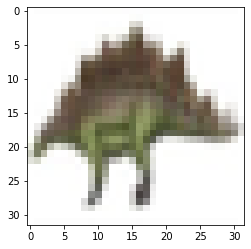

In [3]:
(X_train,Y_train),(X_test,Y_test)=cifar100.load_data()
plt.imshow(X_train[1])
plt.show()

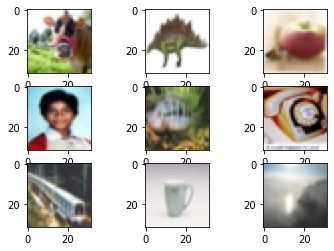

In [4]:
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(X_train[i],cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
X_train=X_train.reshape(50000,3072)
X_test=X_test.reshape(10000,3072)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255
Y_train=np_utils.to_categorical(Y_train,100)
Y_test=np_utils.to_categorical(Y_test,100)

In [9]:
model=Sequential() 
model.add(Dense(512,activation='relu',input_shape=(3072,))) 
model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1)) 
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               1573376   
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               51300     
                                                                 
Total params: 1,887,332
Trainable params: 1,887,332
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(),metrics=['accuracy'])
history= model.fit(X_train, Y_train, batch_size=128, epochs=500, verbose=1, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=50)])

Epoch 1/500
313/313 [==============================] - 12s 36ms/step - loss: 4.3208 - accuracy: 0.0523 - val_loss: 3.9509 - val_accuracy: 0.1004
Epoch 2/500
313/313 [==============================] - 11s 35ms/step - loss: 3.9022 - accuracy: 0.1012 - val_loss: 3.8658 - val_accuracy: 0.1058
Epoch 3/500
313/313 [==============================] - 11s 35ms/step - loss: 3.7530 - accuracy: 0.1250 - val_loss: 3.8463 - val_accuracy: 0.1105
Epoch 4/500
313/313 [==============================] - 11s 35ms/step - loss: 3.6497 - accuracy: 0.1435 - val_loss: 3.8273 - val_accuracy: 0.1149
Epoch 5/500
313/313 [==============================] - 11s 35ms/step - loss: 3.5705 - accuracy: 0.1561 - val_loss: 3.5943 - val_accuracy: 0.1610
Epoch 6/500
313/313 [==============================] - 11s 35ms/step - loss: 3.5093 - accuracy: 0.1653 - val_loss: 3.5688 - val_accuracy: 0.1643
Epoch 7/500
313/313 [==============================] - 11s 35ms/step - loss: 3.4516 - accuracy: 0.1789 - val_loss: 3.4607 - val_ac

In [12]:
Score=model.evaluate(X_test,Y_test,verbose=0)
print('Test Loss', Score[0])
print('Test Accuracy', Score[1])

Test Loss 3.82513427734375
Test Accuracy 0.1949000060558319


<function matplotlib.pyplot.show>

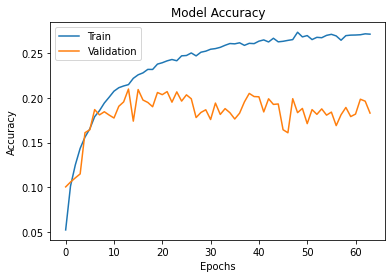

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [15]:
from google.colab import drive
drive.mount('/content/drive')
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('cifar100.ipynb')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File ‘colab_pdf.py’ already there; not retrieving.





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/cifar100.ipynb to pdf
[NbConvertApp] Support files will be in cifar100_files/
[NbConvertApp] Making directory ./cifar100_files
[NbConvertApp] Making directory ./cifar100_files
[NbConvertApp] Making directory ./cifar100_files
[NbConvertApp] Writing 42632 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 114258 bytes to /content/drive/My Drive/cifar100.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'